In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [49]:
CATEGORIES = ["fire", "smoke", "non fire"]
IMG_SIZE = 256

In [50]:
train_dir = "FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train"
test_dir = "FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test"


In [51]:
import tensorflow as tf

In [52]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = test_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    data_format=None
)

Found 31707 files belonging to 3 classes.
Found 9446 files belonging to 3 classes.


In [62]:
class_names = train_ds.class_names
print(class_names)

['Smoke', 'fire', 'non fire']


In [16]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [18]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),activation='relu',padding="valid",input_shape=(256, 256, 3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, kernel_size=(3,3),padding="valid",activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(128, kernel_size=(3,3),padding="valid",activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

C:\Users\danud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,427 (56.64 MB)

 Trainable params: 14,847,427 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [21]:

history = model.fit(train_ds, epochs=10, validation_data=validation_ds)



Epoch 1/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 843s 849ms/step - accuracy: 0.8861 - loss: 0.3211 - val_accuracy: 0.9553 - val_loss: 0.1435
Epoch 2/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 826s 833ms/step - accuracy: 0.9547 - loss: 0.1376 - val_accuracy: 0.9651 - val_loss: 0.1078
Epoch 3/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 824s 831ms/step - accuracy: 0.9715 - loss: 0.0859 - val_accuracy: 0.9778 - val_loss: 0.0787
Epoch 4/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 779s 785ms/step - accuracy: 0.9793 - loss: 0.0598 - val_accuracy: 0.9758 - val_loss: 0.0907
Epoch 5/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 783s 789ms/step - accuracy: 0.9856 - loss: 0.0395 - val_accuracy: 0.9830 - val_loss: 0.0779
Epoch 6/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 781s 788ms/step - accuracy: 0.9881 - loss: 0.0341 - val_accuracy: 0.9812 - val_loss: 0.0690
Epoch 7/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 778s 784ms/step - accuracy: 0.9907 - loss: 0.0263 - val_accuracy: 0.9854 - val_loss: 0.0640
Epoch 8/10
991/991 ━━━━━━━━━━━━━━━━━━━━ 776s 783ms/step - accuracy: 0.9925 -

In [25]:
model.save('new_model.keras')

In [48]:
new_model = tf.keras.models.load_model('new_model.keras')


new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,542,283 (169.92 MB)

 Trainable params: 14,847,427 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,694,856 (113.28 MB)

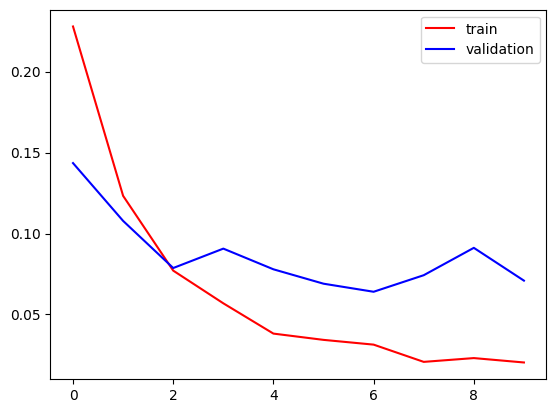

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

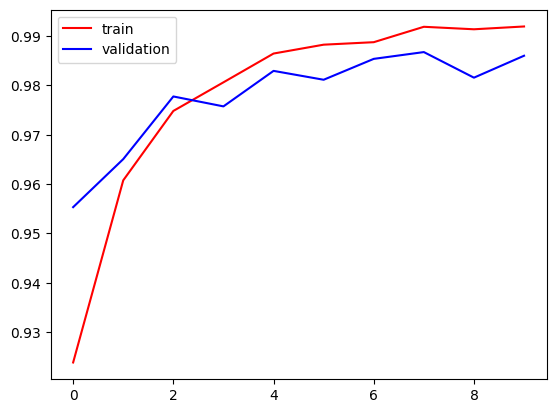

In [28]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [30]:
val_loss, val_acc = model.evaluate(train_ds)

991/991 ━━━━━━━━━━━━━━━━━━━━ 192s 193ms/step - accuracy: 0.9944 - loss: 0.0134


In [32]:
val_loss, val_acc = model.evaluate(validation_ds)

296/296 ━━━━━━━━━━━━━━━━━━━━ 57s 192ms/step - accuracy: 0.9852 - loss: 0.0741


In [2]:
import tensorflow as tf
new_model = tf.keras.models.load_model('new_model.keras')

new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,542,283 (169.92 MB)

 Trainable params: 14,847,427 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,694,856 (113.28 MB)

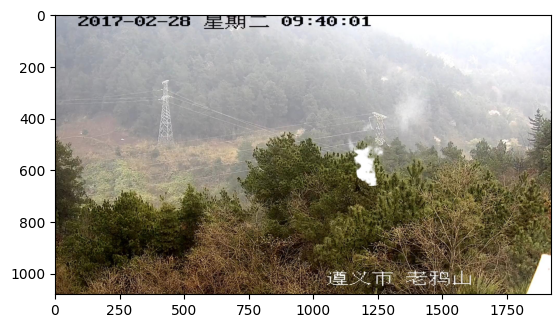

In [3]:
import cv2
img = cv2.imread("FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test/Smoke/Smoke (1050).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
img.shape

(1080, 1920, 3)

In [5]:
resized_img = cv2.resize(img, (256, 256))
input_img = resized_img.reshape((1,256,256,3))

image = tf.cast(input_img/255. ,tf.float32)

In [6]:
input_img.shape

(1, 256, 256, 3)

In [7]:
predict = new_model.predict(input_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


In [8]:
print(np.argmax(predict))

0


In [9]:
def preprocess_frame(frame):
    resized_frame = cv2.resize(frame, (256, 256))
    input_frame = resized_frame.reshape((1, 256, 256, 3))
    input_frame = tf.cast(input_frame / 255.0, tf.float32)
    return input_frame

In [10]:
class_names = ['Smoke', 'fire', 'non fire']

In [11]:

def real_time_detection(threshold=0.5):
    cap = cv2.VideoCapture(0)  

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        input_frame = preprocess_frame(frame)
        predict = new_model.predict(input_frame)
        class_index = np.argmax(predict)
        class_name = class_names[class_index]
        probability = predict[0][class_index]

        if class_name != "non fire" and probability > threshold:
            text = f'Class: {class_name}, Probability: {probability:.2f}'
            cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.imshow('Real-time Fire and Smoke Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()





In [11]:
from PIL import Image
import os

def verify_and_convert_images(directory, target_format='JPEG'):
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                with Image.open(os.path.join(root, file)) as img:
                    if img.format not in ['JPEG', 'PNG', 'GIF', 'BMP']:
                        print(f"Converting {file} to {target_format}")
                        rgb_im = img.convert('RGB')
                        rgb_im.save(os.path.join(root, file.split('.')[0] + '.' + target_format.lower()), target_format)
            except IOError:
                print(f"Cannot open {file}. It might be corrupted.")

# Replace 'your_dataset_directory' with the path to your dataset
verify_and_convert_images('FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train/smoke')